# **크롤링? 스크래핑?**

> 웹페이지의 내용을 가져 오는 것을 크롤링(Crawling) 또는 스크래핑(Scraping)이라고 합니다.

## **robots.txt 파일이란 무엇인가요?**

> robots.txt 파일은 검색엔진 크롤러에서 사이트에 요청할 수 있거나 요청할 수 없는 페이지 또는 파일을 크롤러에 지시하는 파일입니다. 이 파일은 요청으로 인해 사이트가 오버로드되지 않도록 하는 데 주로 사용되며, Google로부터 웹페이지를 숨기는 데 사용하는 메커니즘이 아닙니다. 웹페이지가 Google에 표시되지 않도록 하려면 noindex 명령어를 사용하거나 페이지를 비밀번호로 보호해야 합니다.

> https://support.google.com/webmasters/answer/6062608?hl=ko

In [1]:
from selenium import webdriver
driver = webdriver.Firefox(executable_path='/home/woong/project/utils/geckodriver');
#driver = webdriver.Chrome(executable_path='/home/woong/wget/chromedriver')

In [7]:
driver.get('https://www.naning9.com/?lang=ko')
driver.get('https://www.naning9.com/shop/list.php?cate=0a')

![test](./figs/naningu.png)

![test](./figs/naningu1.png)
---
![test](./figs/naningu2.png)
---
![test](./figs/naningu3.png)

In [9]:
names  = driver.find_elements_by_xpath("//li[@class='item_name ']")
prices = driver.find_elements_by_xpath("//li[@class='item_price']/p")
images = driver.find_elements_by_xpath("//img[@class='orc_src']")
items = list(zip(names, prices, images))

## XPATH 문법
| 표현 | 설명 |
|-|-|
|nodename | Node 명이 "nodename"인 Node 선택 |
|/|루트 Node로 부터 선택|
|//|현재 Node로부터 문서상의 모든 Node 조회|
|.|현재 Node 선택|
|..|현재 Node의 부모 선택|
|@|현재 Node의 속성 선택|

In [10]:
img_list = []
for item, price, image in items:
    if('티' in item.text):
        print('{}, {}'.format(item.text, price.text))
        img_list.append(image.get_attribute('src'))

러비튼 폴라반팔티(44~66), 16,200
디갈렌 겉기모롱티(백화점상품/44~77), 18,800
이그직 나염후드티(44~77), 23,200
이그직 나염후드티(44~77), 23,200
디갈렌 겉기모롱티(백화점상품/44~77), 18,800
러비튼 폴라반팔티(44~66), 16,200
[더네프]젤네일스티커 3종 단독특가
네일 or 패디 선택 구매 가능!, 19,100
스티앙 플랫슈즈(225~245 / 백화점상품), 15,900
엑시온 브이넥텐셀티, 16,200
퍼피머핀티(백화점상품/4가지타입/S,M,L,XL), 10,000
벤뜨 퍼피스트라이프티(S,M,L,XL / 백화점상품), 21,000
비아렐 린넨 티, 10,000


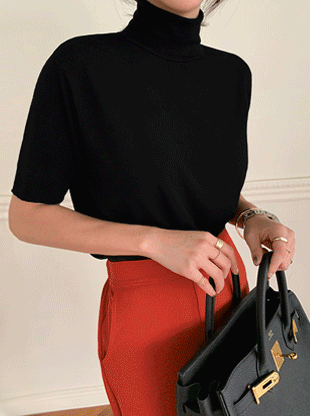

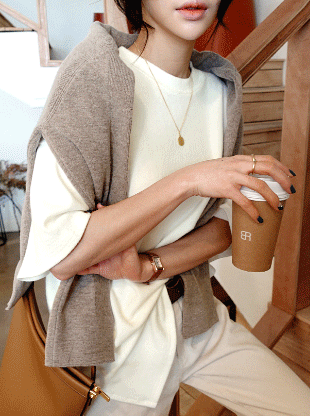

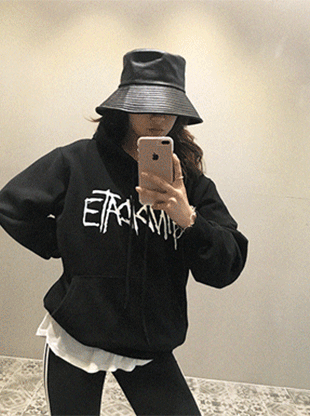

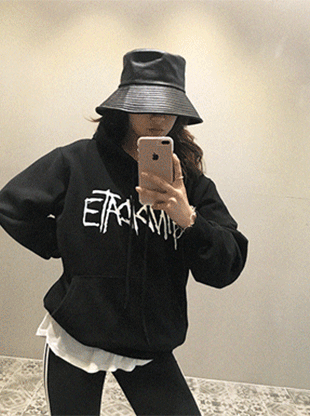

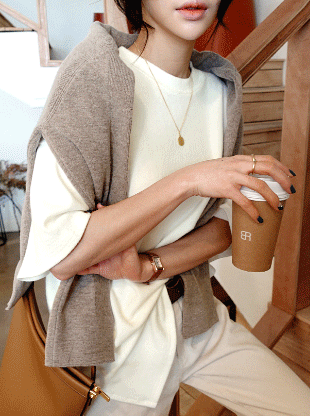

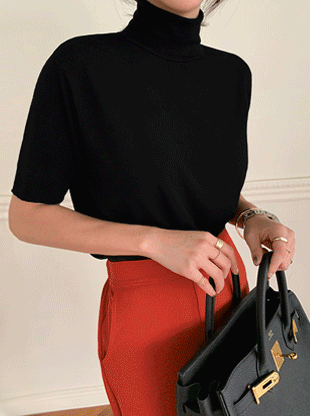

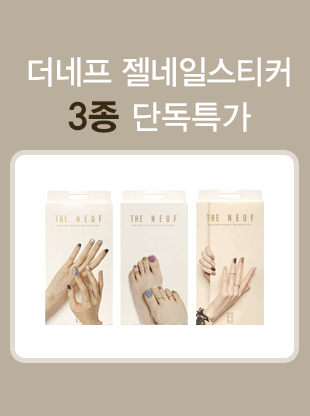

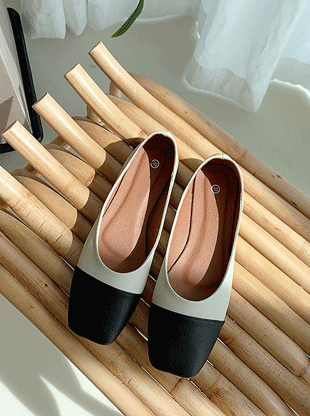

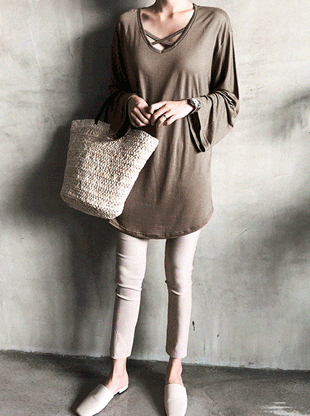

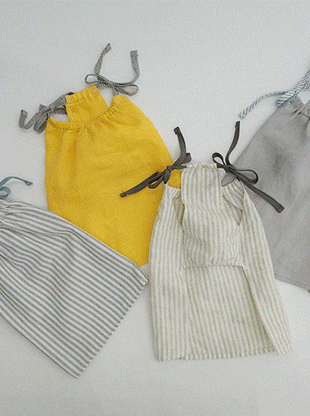

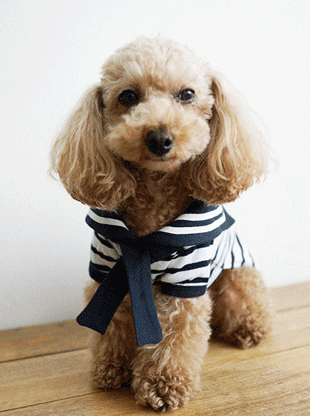

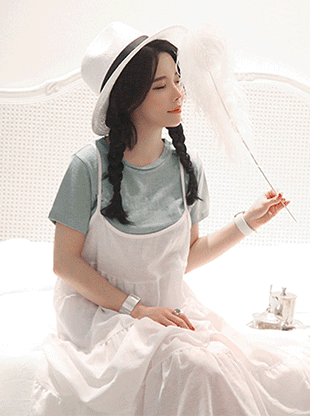

In [11]:
from IPython.display import Image
from IPython.display import display
for img_url in img_list:
    img = Image(img_url)
    display(img)